In [1]:
import seaborn as sns
from utils import ForexPreprocessor

sns.set_theme(style='whitegrid')
sns.set_palette('colorblind')

In [2]:
%matplotlib inline
from data_exploration import explore

## Read the dataset

In [ ]:
# temp = pd.read_csv('./data/titanic.csv')
timeframe = 60
processor = ForexPreprocessor(timeframe)
data = processor.load_and_preprocess(f'data/GBPUSD/GBPUSD_{timeframe}.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101166 entries, 39 to 101211
Data columns (total 27 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   time              101166 non-null  datetime64[ns]
 1   close             101166 non-null  float64       
 2   volume            101166 non-null  int64         
 3   change            101166 non-null  float64       
 4   hour              101166 non-null  int32         
 5   day_of_week       101166 non-null  int32         
 6   month             101166 non-null  int32         
 7   is_weekend        101166 non-null  int64         
 8   sma_20            101166 non-null  float64       
 9   sma_50            101166 non-null  float64       
 10  rsi               101166 non-null  float64       
 11  high_low_pct      101166 non-null  float64       
 12  volatility        101166 non-null  float64       
 13  price_position    101166 non-null  int64         
 14  volume_m

In [4]:
data.head()

,time,close,volume,change,hour,day_of_week,month,is_weekend,sma_20,sma_50,...,change_6h,change_24h,future_change,price_trend,volatility_level,volume_level,rsi_zone,trading_session,trend_position,target
39,2007-08-14 18:00:00,2.0012,119711,0.024991,18,1,8,0,2.009418,2.014021,...,-0.039761,0.017391,-0.074955,Flat,Low,High,Oversold,American,False,0
40,2007-08-14 19:00:00,1.9997,200026,-0.074955,19,1,8,0,2.008833,2.013444,...,-0.067124,0.094391,0.065010,Flat,Low,High,Oversold,American,False,1
41,2007-08-14 20:00:00,2.0010,147501,0.065010,20,1,8,0,2.008222,2.012926,...,-0.141802,-0.039706,-0.059970,Flat,Low,High,Oversold,American,False,0
42,2007-08-14 21:00:00,1.9998,173835,-0.059970,21,1,8,0,2.007532,2.012356,...,-0.288989,-0.124131,0.005001,Flat,Low,High,Oversold,American,False,1
43,2007-08-14 22:00:00,1.9999,165870,0.005001,22,1,8,0,2.006878,2.011826,...,-0.024985,0.029828,0.015001,Flat,Low,High,Oversold,American,False,1


## Get dtypes for each columns

In [5]:
str_var_list, num_var_list, all_var_list = explore.get_dtypes(data=data)

In [6]:
print(str_var_list) # string type
print(num_var_list) # numeric type
print(all_var_list) # all

['time', 'price_trend', 'volatility_level', 'volume_level', 'rsi_zone', 'trading_session', 'trend_position']
['close', 'volume', 'change', 'hour', 'day_of_week', 'month', 'is_weekend', 'sma_20', 'sma_50', 'rsi', 'high_low_pct', 'volatility', 'price_position', 'volume_ma', 'volume_ratio', 'change_1h', 'change_6h', 'change_24h', 'future_change', 'target']
['time', 'price_trend', 'volatility_level', 'volume_level', 'rsi_zone', 'trading_session', 'trend_position', 'close', 'volume', 'change', 'hour', 'day_of_week', 'month', 'is_weekend', 'sma_20', 'sma_50', 'rsi', 'high_low_pct', 'volatility', 'price_position', 'volume_ma', 'volume_ratio', 'change_1h', 'change_6h', 'change_24h', 'future_change', 'target']


## General data description

In [7]:
explore.describe(data=data,output_path=r'./output/')

,time,close,volume,change,hour,day_of_week,month,is_weekend,sma_20,sma_50,...,change_6h,change_24h,future_change,price_trend,volatility_level,volume_level,rsi_zone,trading_session,trend_position,target
count,101166,101166.000000,101166.000000,101166.000000,101166.000000,101166.000000,101166.000000,101166.000000,101166.000000,101166.000000,...,101166.000000,101166.000000,101166.000000,101166,101166,101166,101166,101166,101166,101166.00000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3,3,3,3,4,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Flat,Low,Low,Neutral,European,False,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,100296,101050,48365,73380,33759,100785,NaN
mean,2015-09-19 09:46:15.493742848,1.471584,9557.094123,-0.000403,11.498982,2.179369,6.561888,0.035951,1.471657,1.471736,...,-0.000406,-0.000414,-0.000408,NaN,NaN,NaN,NaN,NaN,NaN,0.49829
min,2007-08-14 18:00:00,1.040000,1.000000,-5.724838,0.000000,0.000000,1.000000,0.000000,1.066689,1.071638,...,-5.724838,-5.724838,-5.724838,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
25%,2011-08-29 14:15:00,1.301170,3201.000000,-0.050513,6.000000,1.000000,4.000000,0.000000,1.301148,1.301268,...,-0.050522,-0.050526,-0.050522,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
50%,2015-09-17 21:30:00,1.464740,5866.000000,0.000000,11.000000,2.000000,7.000000,0.000000,1.464705,1.464372,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
75%,2019-10-09 15:45:00,1.596850,10656.750000,0.050400,17.000000,3.000000,10.000000,0.000000,1.597028,1.597203,...,0.050393,0.050385,0.050390,NaN,NaN,NaN,NaN,NaN,NaN,1.00000
max,2023-10-27 19:00:00,2.112400,702044.000000,2.248788,23.000000,6.000000,12.000000,1.000000,2.110080,2.106113,...,2.248788,2.248788,2.248788,NaN,NaN,NaN,NaN,NaN,NaN,1.00000


## Discrete variable barplot
draw the barplot of a discrete variable x against y(target variable). 
By default the bar shows the mean value of y.

### 1. Time-based analysis

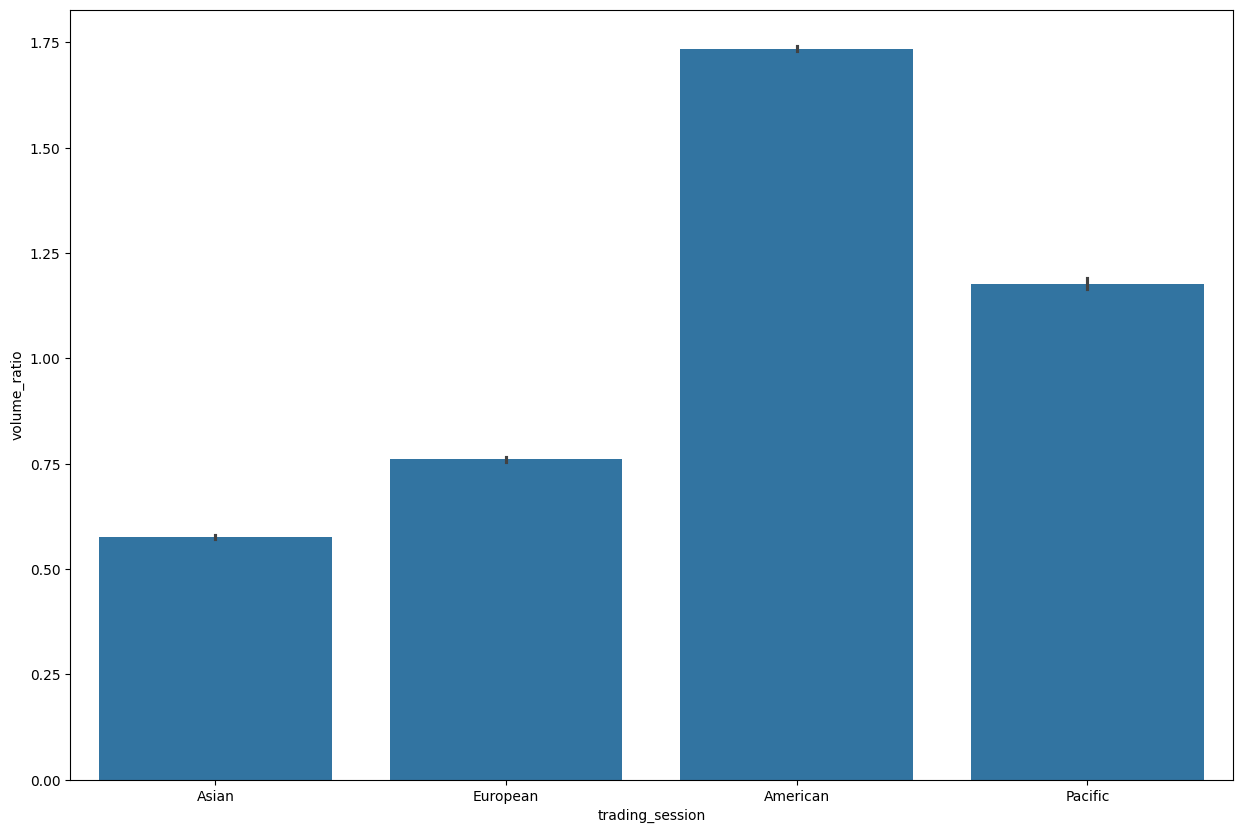

In [8]:
explore.discrete_var_barplot(x='trading_session', y='volume_ratio', data=data, output_path='./output/')

## Discrete variable countplot
draw the countplot of a discrete variable x

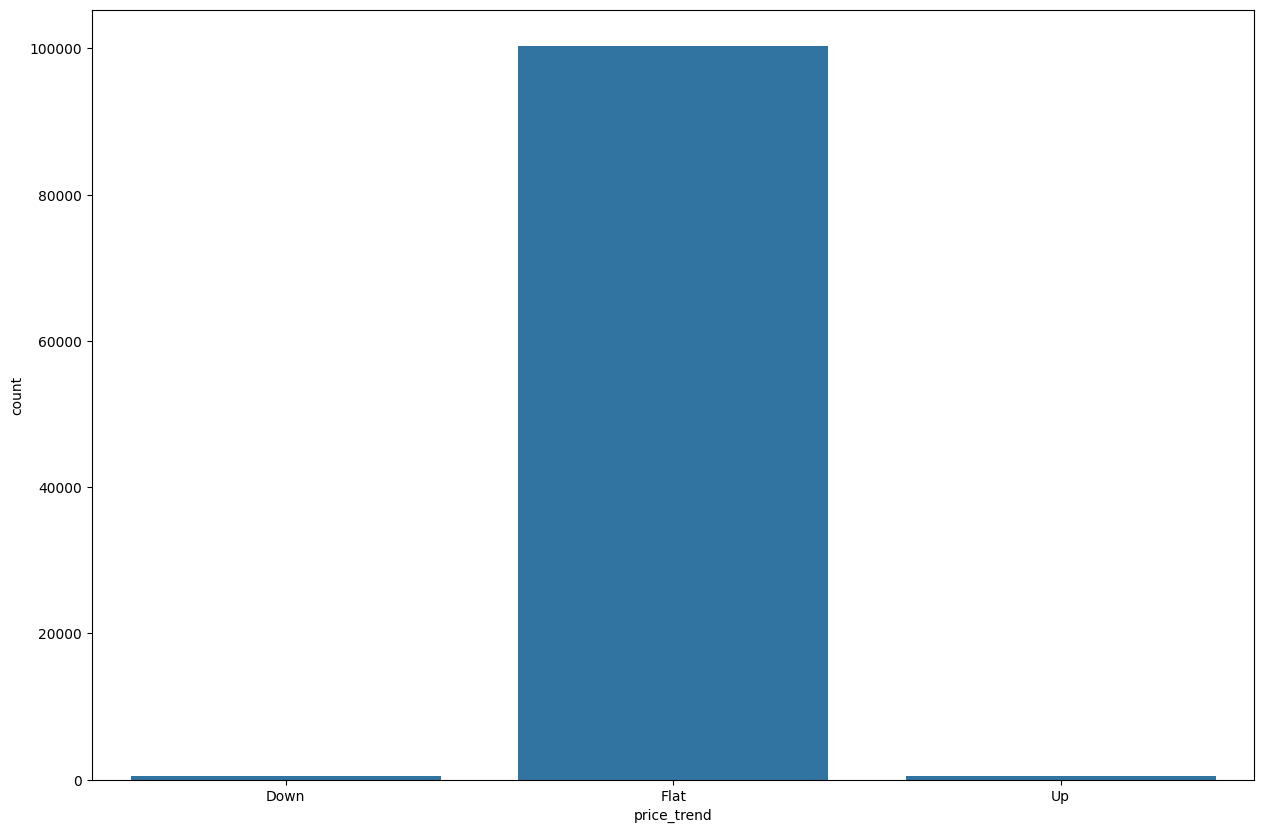

In [9]:
explore.discrete_var_countplot(x='price_trend', data=data, output_path='./output/')

## Discrete variable boxplot
draw the boxplot of a discrete variable x against y.

### 1. Time-based analysis

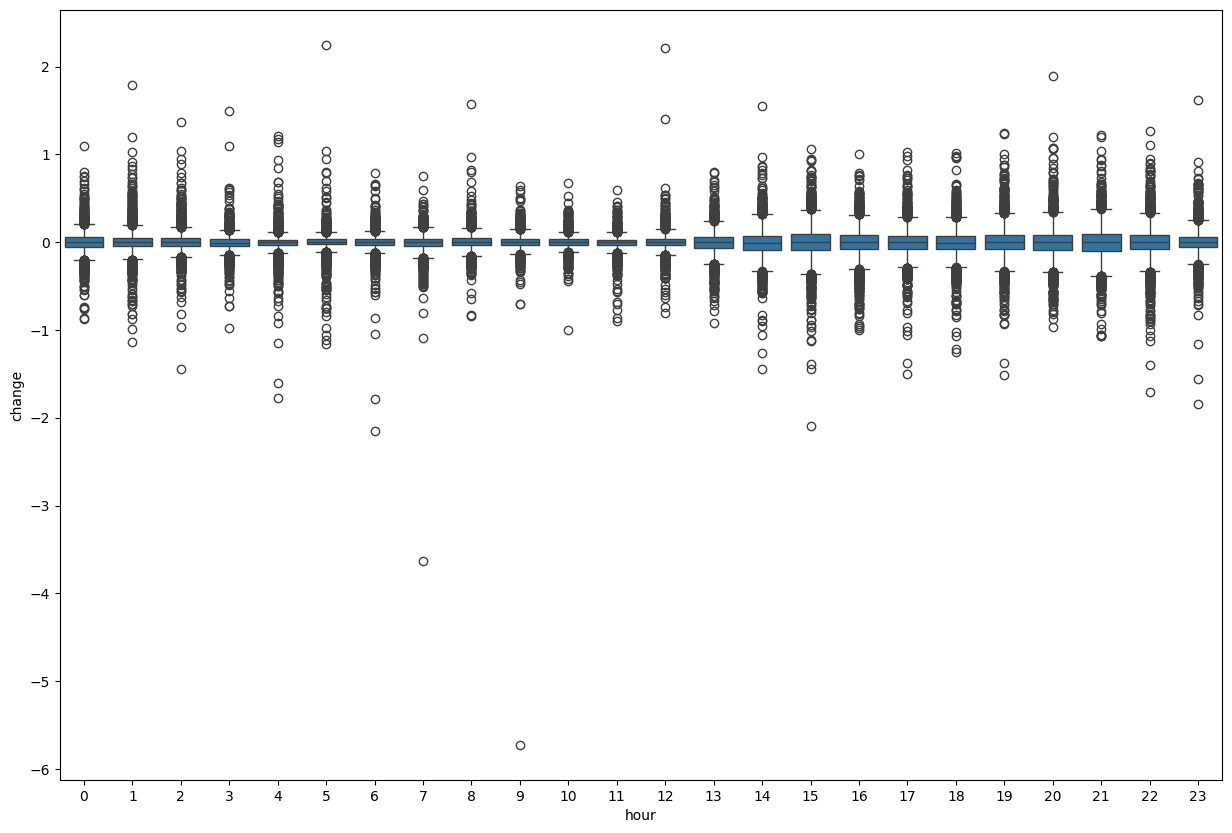

In [10]:
explore.discrete_var_boxplot(x='hour', y='change', data=data, output_path='./output/')

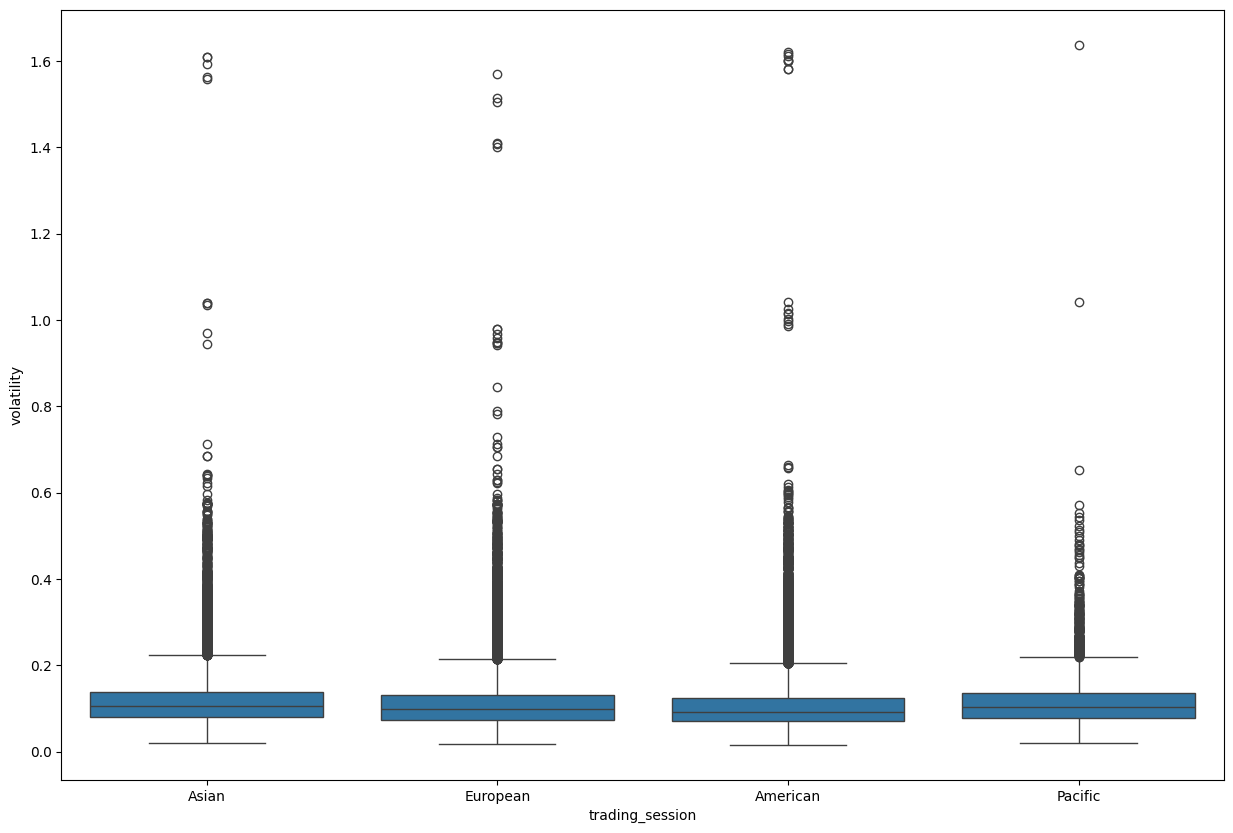

In [11]:
explore.discrete_var_boxplot(x='trading_session', y='volatility', data=data, output_path='./output/')

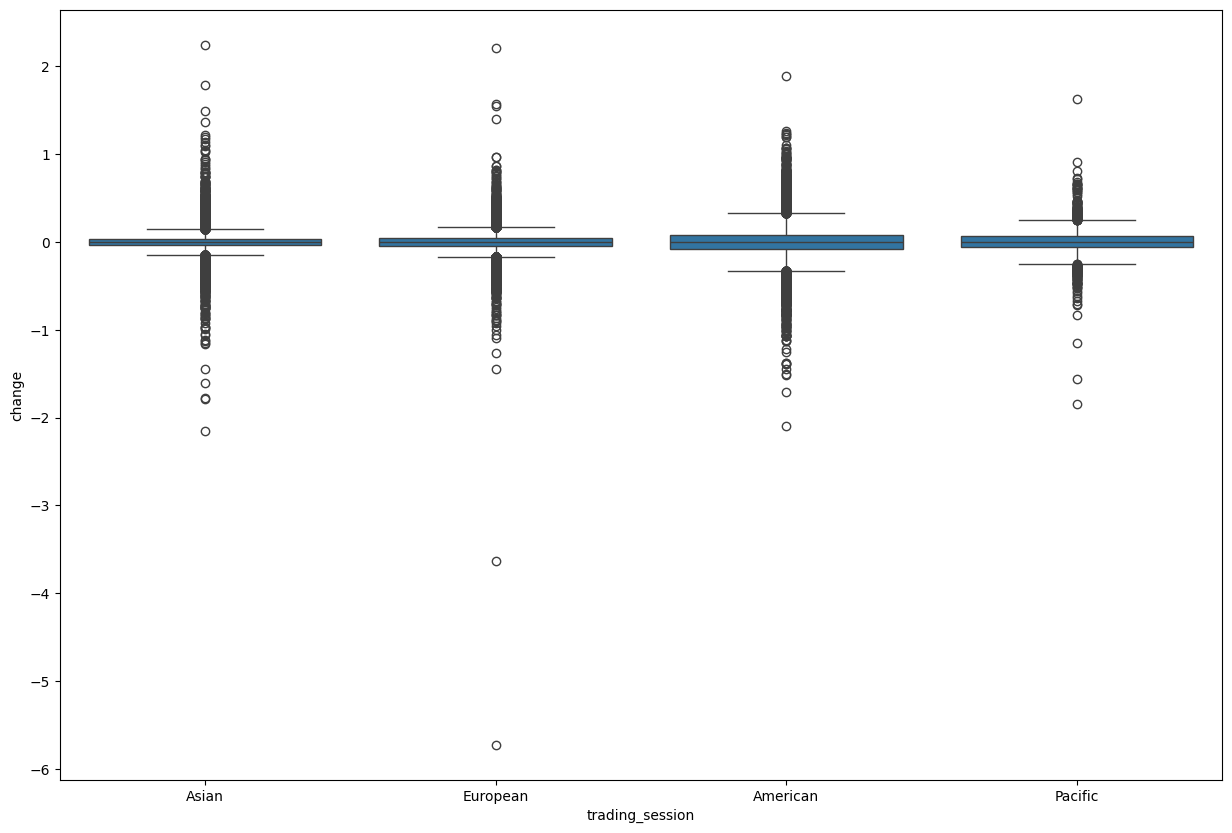

In [12]:
explore.discrete_var_boxplot(x='trading_session', y='change', data=data, output_path='./output/')

### 3. RSI and volatility zones

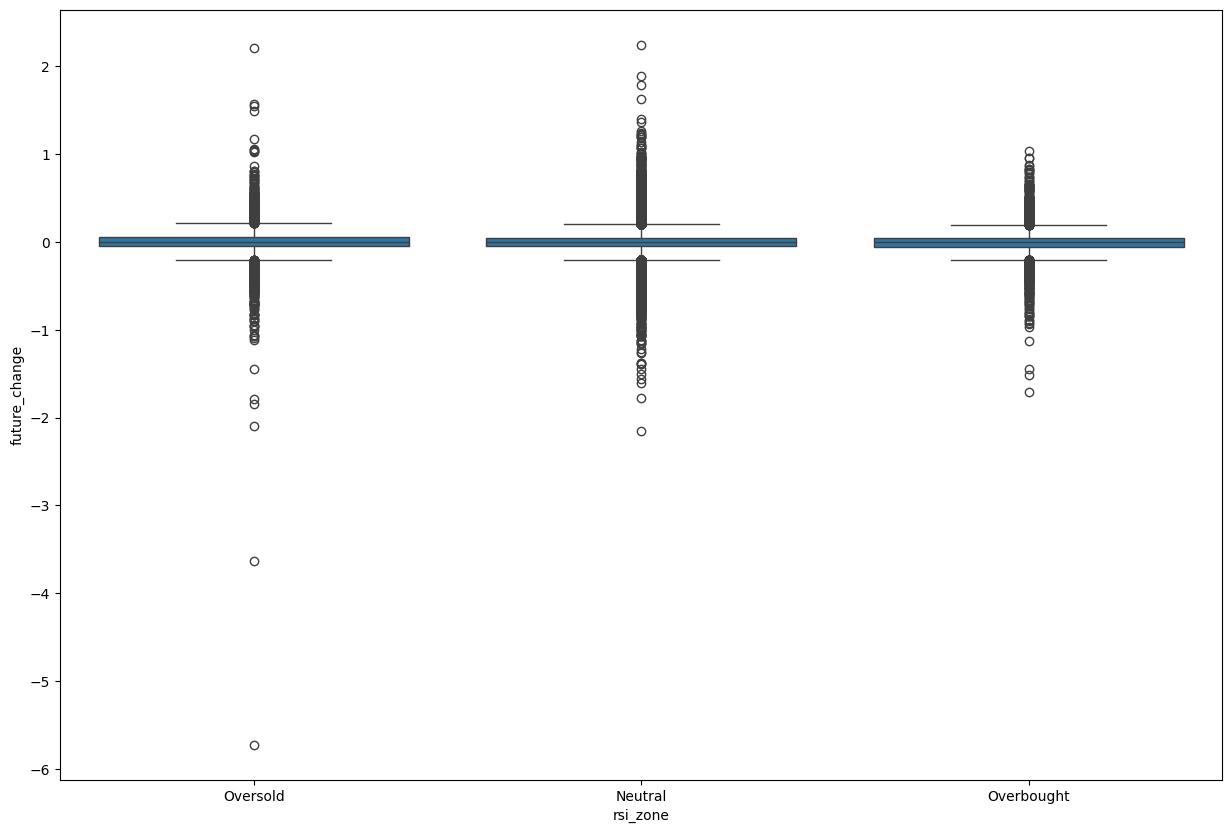

In [13]:
explore.discrete_var_boxplot(x='rsi_zone', y='future_change', data=data, output_path='./output/')

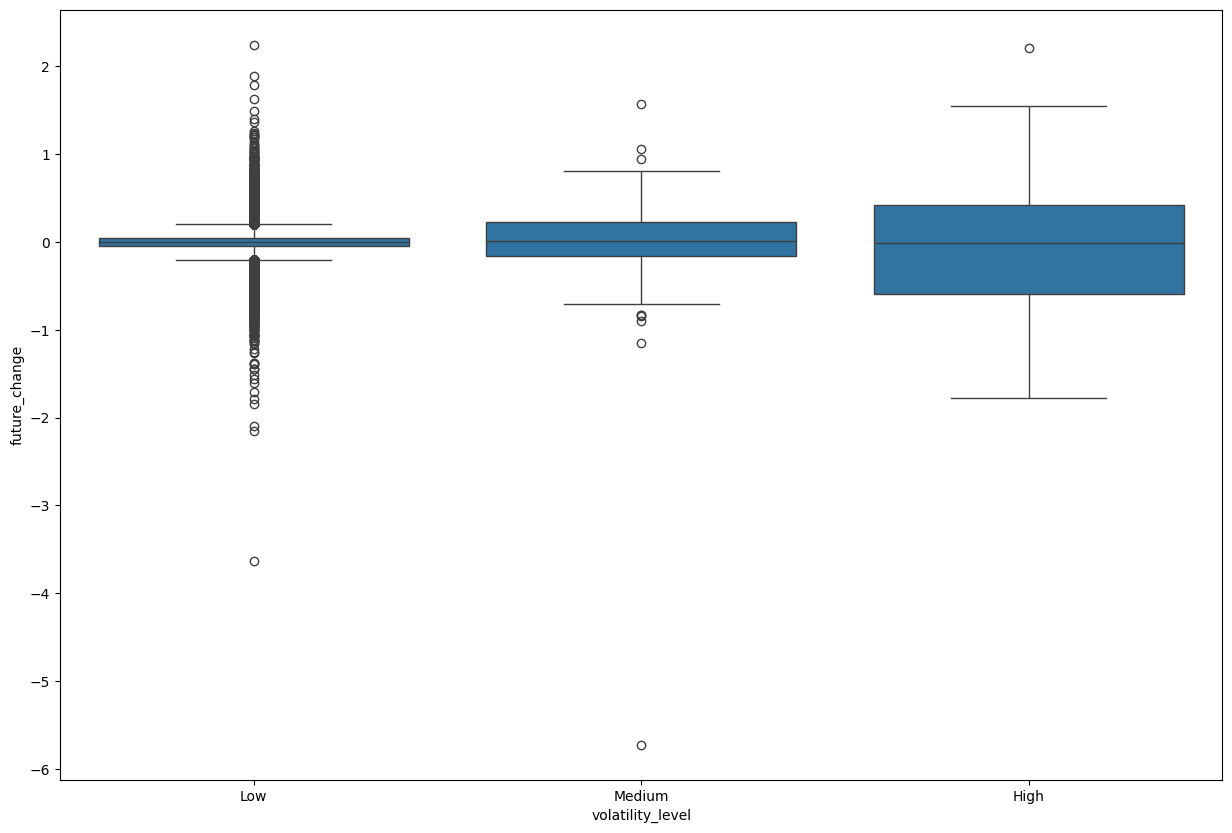

In [14]:
explore.discrete_var_boxplot(x='volatility_level', y='future_change', data=data, output_path='./output/')

### 4. Volume analysis

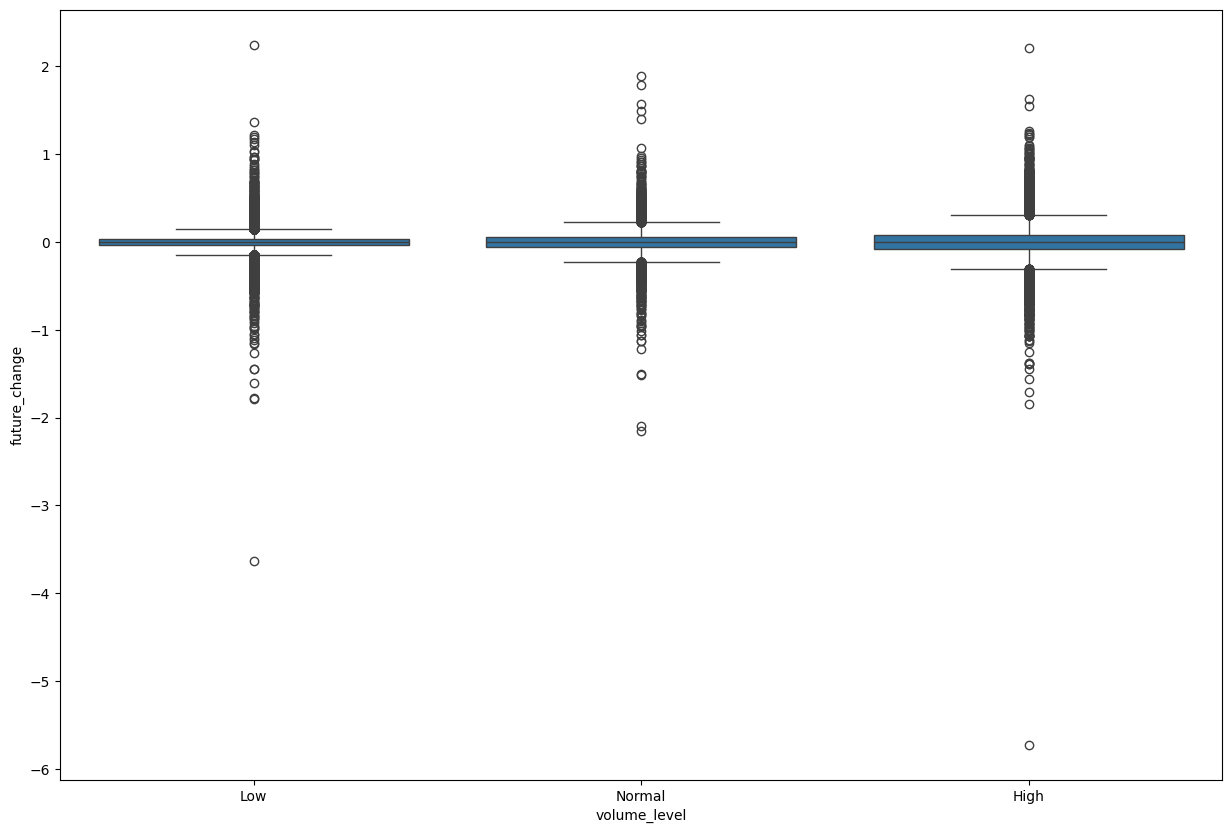

In [15]:
explore.discrete_var_boxplot(x='volume_level', y='future_change', data=data, output_path='./output/')

In [16]:
# Convert categories to codes for correlation
data['price_trend_code'] = data['price_trend'].cat.codes
data['session_code'] = data['trading_session'].cat.codes
data['vol_level_code'] = data['volatility_level'].cat.codes

### 5. Trend position analysis

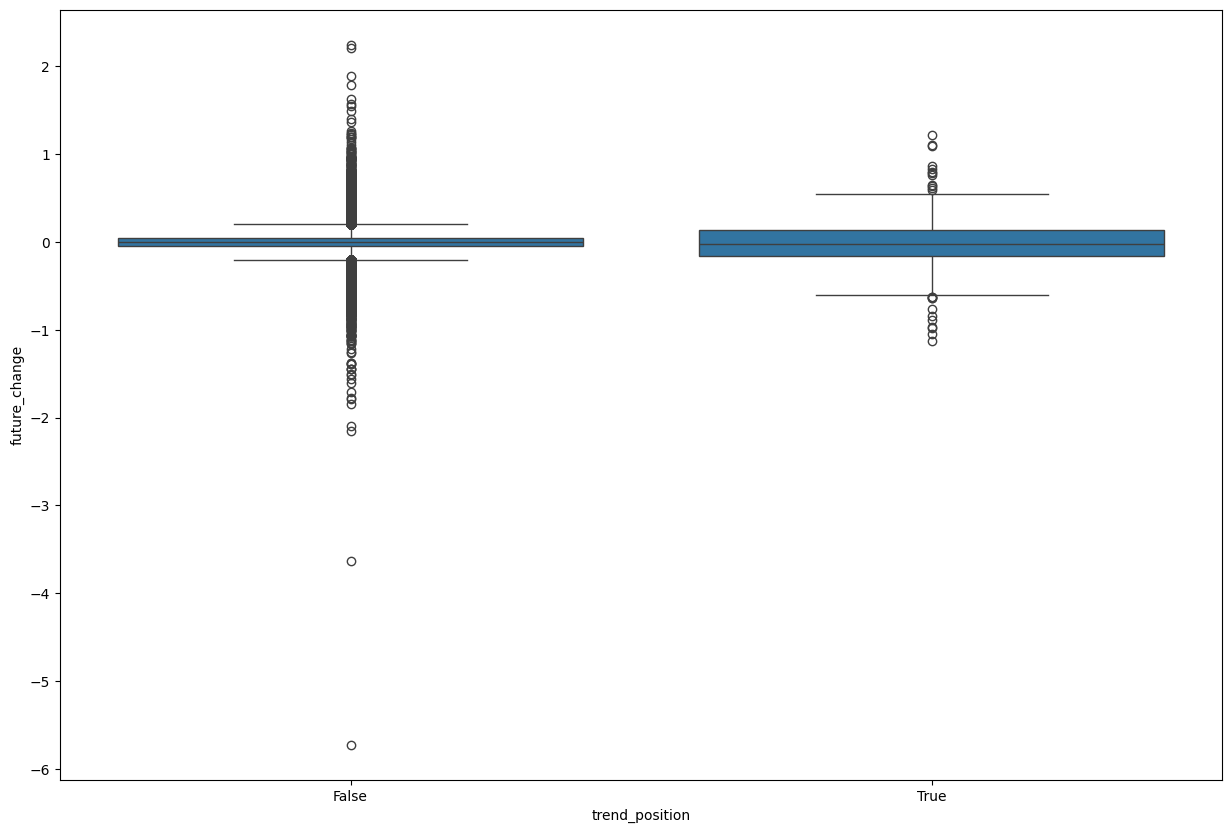

In [17]:
explore.discrete_var_boxplot(x='trend_position', y='future_change', data=data, output_path='./output/')

## Continuous variable distplot
draw the distplot of a continuous variable x.

### 6. Continuous distributions


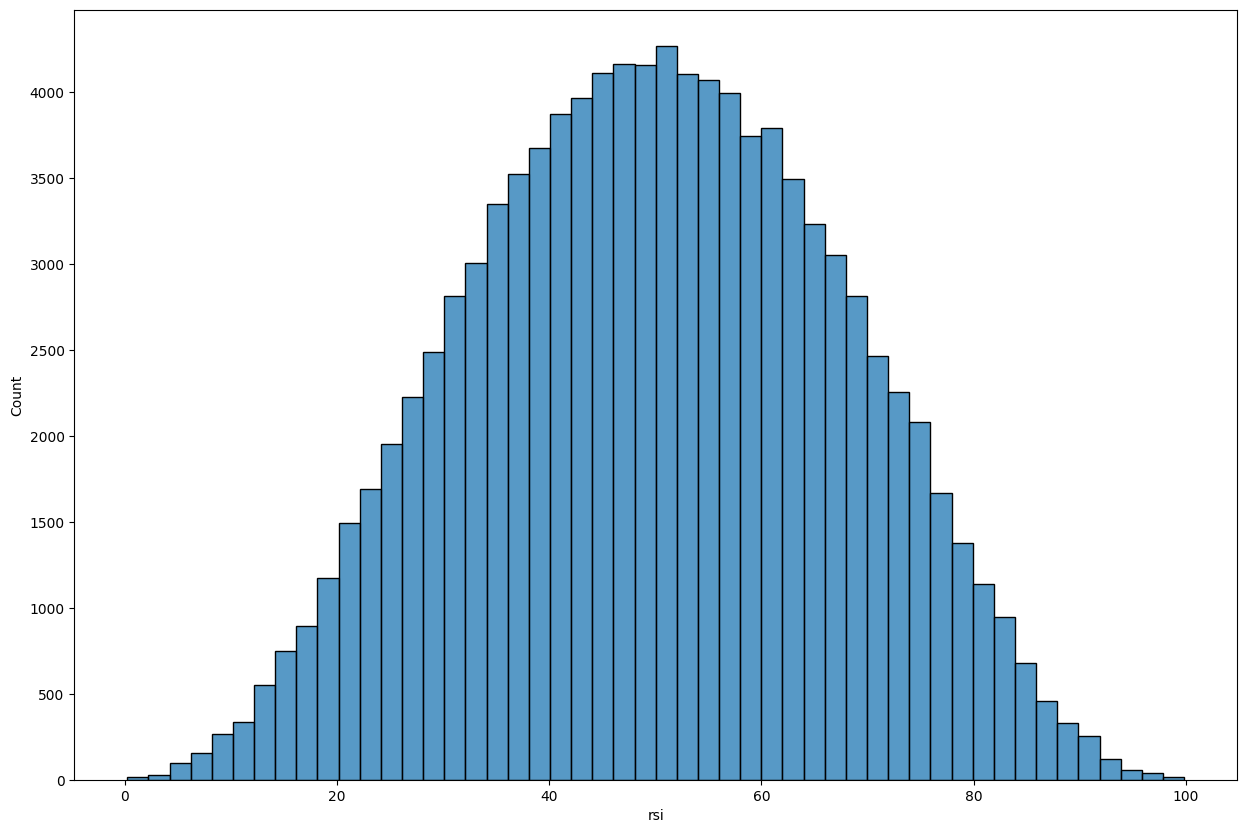

In [18]:
explore.continuous_var_distplot(x=data['rsi'], output_path='./output/', bins=50)


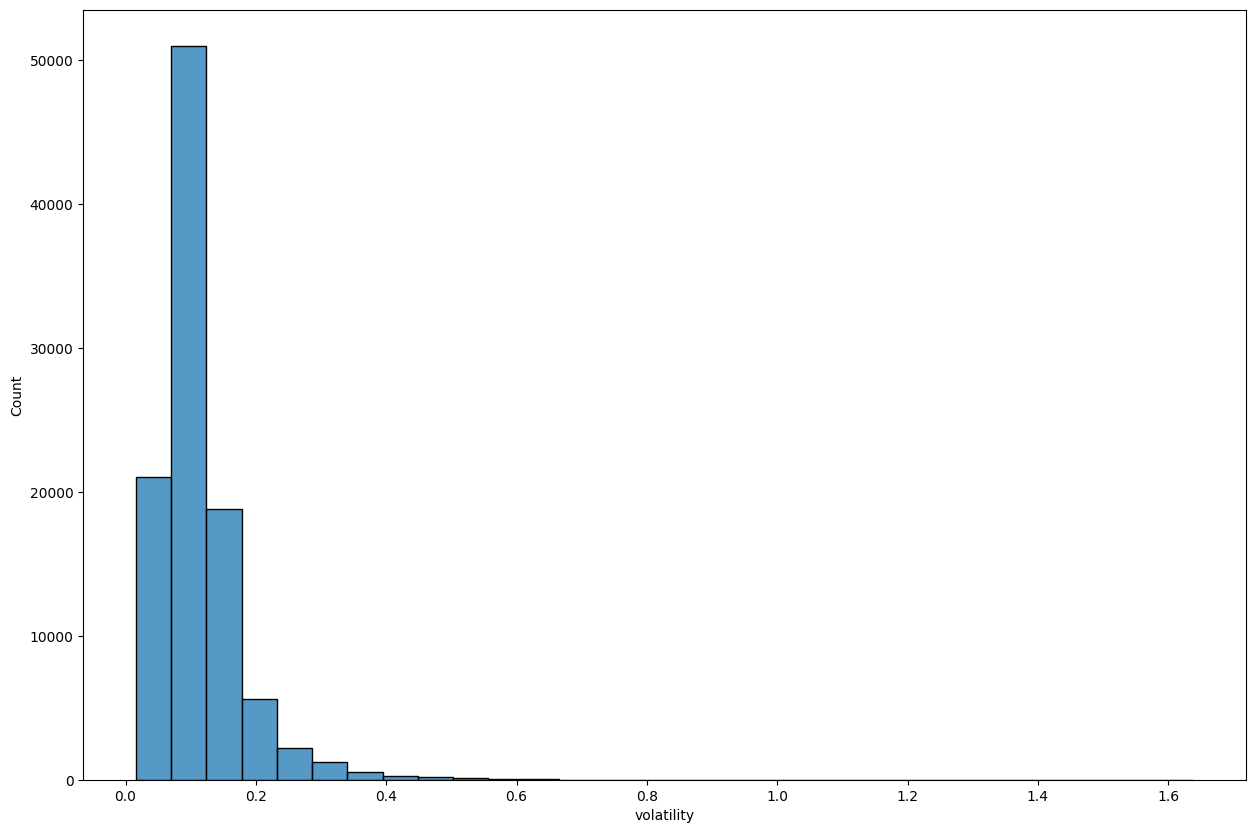

In [19]:
explore.continuous_var_distplot(x=data['volatility'], output_path='./output/', bins=30)


## Scatter plot
draw the scatter-plot of two variables.

### 2. Momentum analysis 

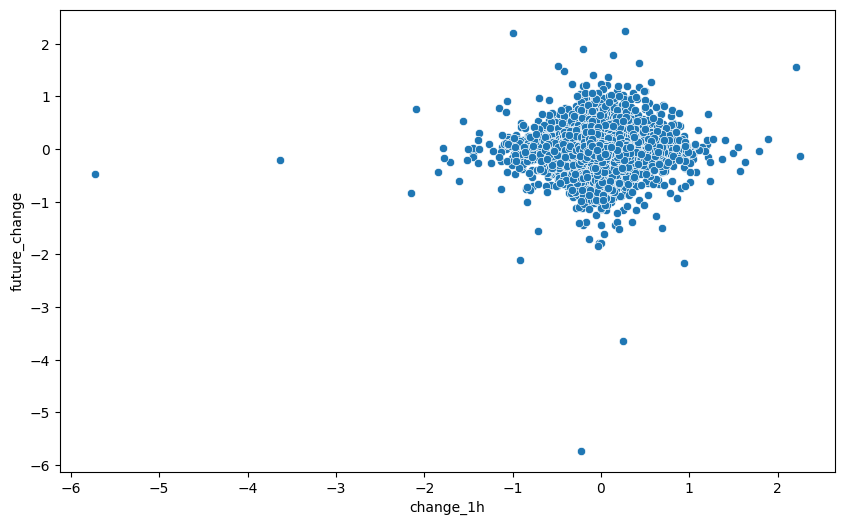

In [20]:
explore.scatter_plot(x=processor.lag_columns[0], y='future_change', data=data, output_path='./output/')

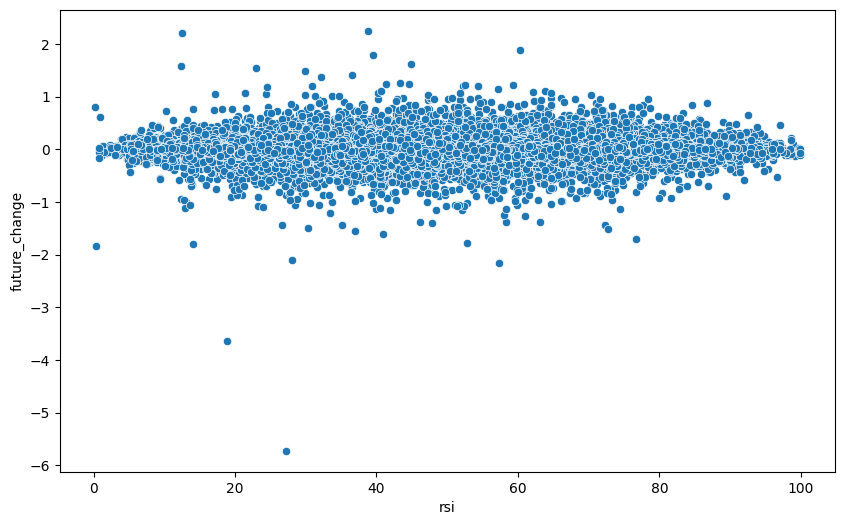

In [21]:
explore.scatter_plot(x='rsi', y='future_change', data=data, output_path='./output/')


## Correlation plot
draw the correlation plot between variables.

### 9. Correlation analysis

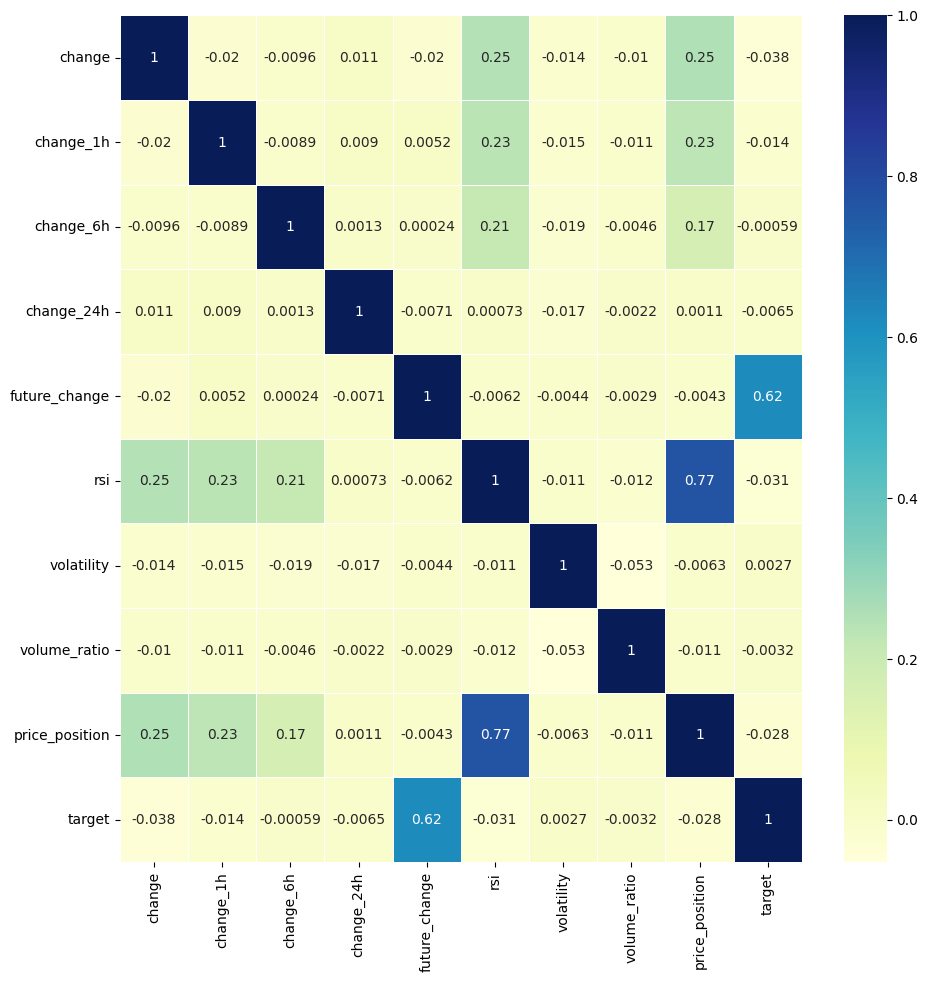

In [22]:
explore.correlation_plot(data=data[processor.momentum_features], output_path='./output/')

## Heatmap

### 7. Multi-dimensional heatmaps

/tmp/ipykernel_1828900/738224585.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  session_trend_pivot = data.pivot_table(values='change', index='trading_session',


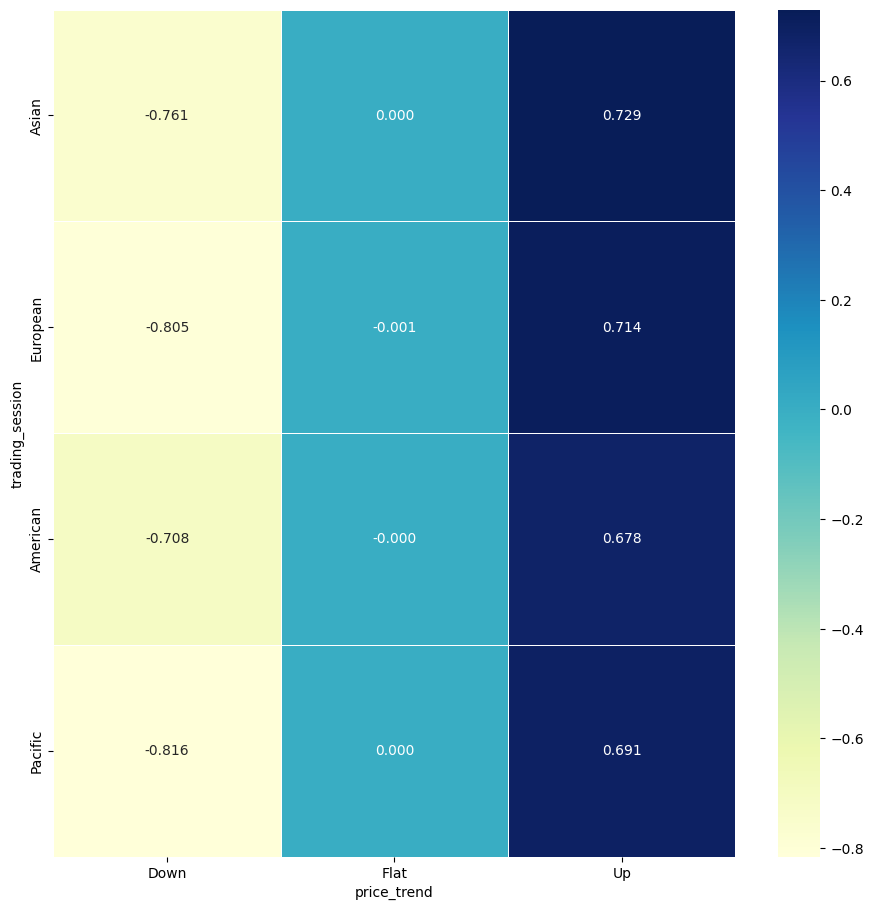

In [23]:

session_trend_pivot = data.pivot_table(values='change', index='trading_session', 
                                     columns='price_trend', aggfunc='mean')
explore.heatmap(data=session_trend_pivot, output_path='./output/', fmt='.3f')


/tmp/ipykernel_1828900/3539906006.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  rsi_vol_pivot = data.pivot_table(values='future_change', index='rsi_zone',


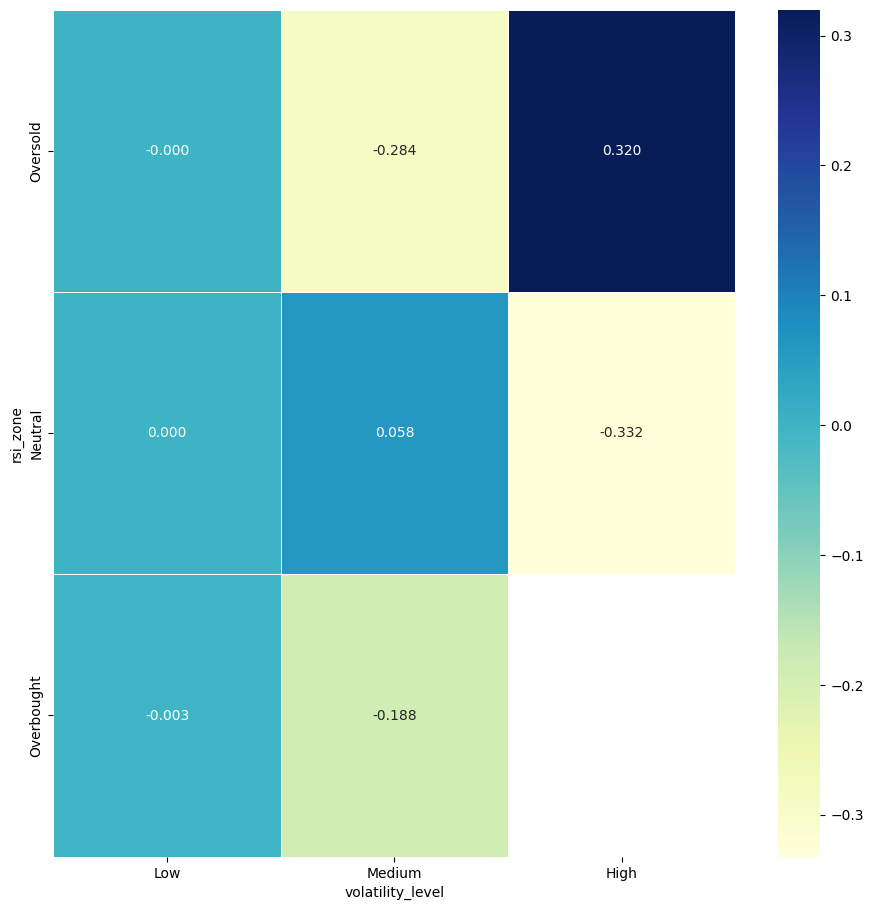

In [24]:
rsi_vol_pivot = data.pivot_table(values='future_change', index='rsi_zone', 
                               columns='volatility_level', aggfunc='mean')
explore.heatmap(data=rsi_vol_pivot, output_path='./output/', fmt='.3f')


### 8. Target prediction probability by hour and day

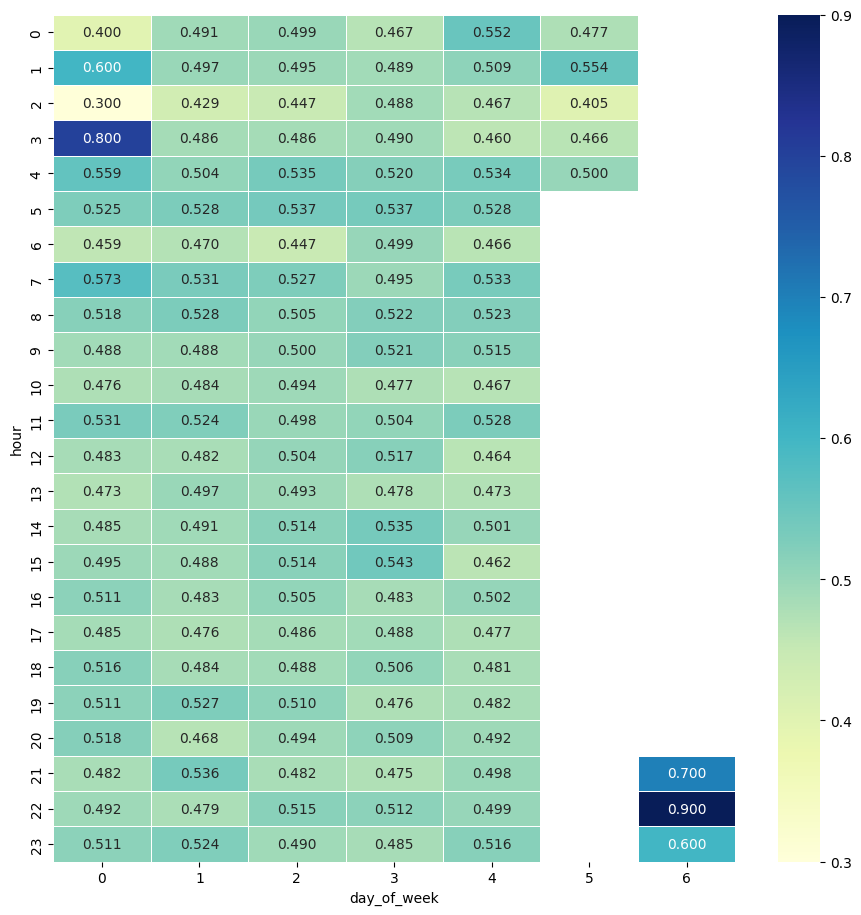

In [25]:
hourly_target_pivot = data.pivot_table(values='target', index='hour', columns='day_of_week', aggfunc='mean')
explore.heatmap(data=hourly_target_pivot, output_path='./output/', fmt='.3f')


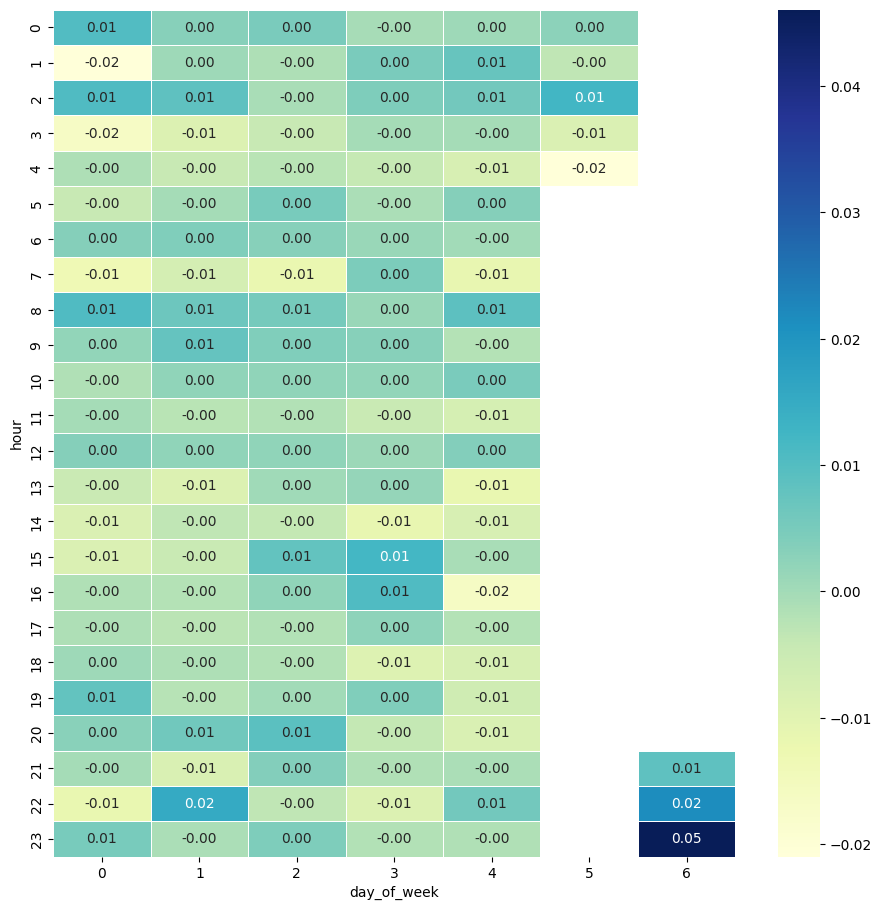

In [26]:
pivot_data = data.pivot_table(values='change', index='hour', columns='day_of_week', aggfunc='mean')
explore.heatmap(data=pivot_data, output_path='./output/', fmt='.2f')
